In [7]:
import numpy as np

class BayesianLinearRegression:
    def __init__(self, X, y, alpha = 1.0, beta = 1.0):
        self.X = X
        self.y = y
        self.alpha = alpha
        self.beta = beta
        self.jitter = 1e-8
      
    def fit_MLE(self): 
        xTx_inv = np.linalg.inv(np.matmul(self.X.T,self.X) + self.jitter)
        xTy = np.matmul(self.X.T, self.y)
        w_MLE = np.matmul(xTx_inv, xTy)
        self.w_MLE = w_MLE
        return w_MLE

    def fit_MAP(self): 
        Lambda = np.matmul(self.X.T,self.X) + (self.beta/self.alpha)*np.eye(self.X.shape[1])
        Lambda_inv = np.linalg.inv(Lambda)
        xTy = np.matmul(self.X.T, self.y)
        mu = np.matmul(Lambda_inv, xTy)
        self.w_MAP = mu
        self.Lambda_inv = Lambda_inv
        return mu, Lambda_inv
      
    def predictive_distribution(self, X_star):
        mean_star = np.matmul(X_star, self.w_MAP)
        var_star = 1.0/self.alpha + np.matmul(X_star, np.matmul(self.Lambda_inv, X_star.T))
        return mean_star, var_star


In [8]:
import matplotlib.pyplot as plt
from pyDOE import lhs
from scipy.stats import norm


(500, 1)
(500, 500)
(100, 500)


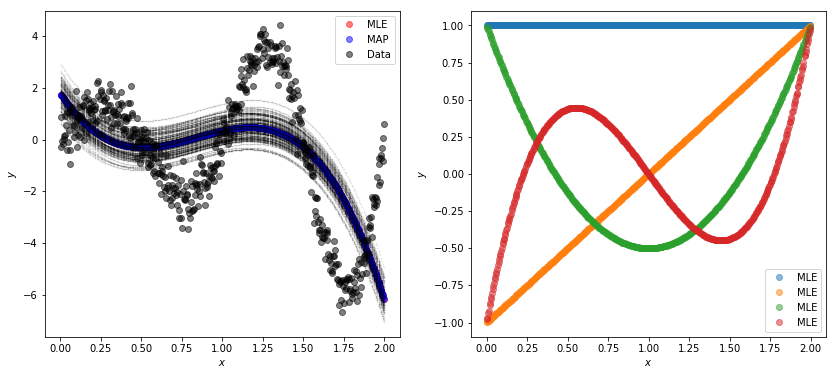

In [14]:
# N is the number of training points.
N = 500
M = 4
noise_var = 0.2
alpha = 1.0/noise_var
beta = 0.1

def feature_1(X, M):
    return X

def feature_2(X, M):
    N = X.shape[0]
    M = M + 1
    output = np.zeros((N,M))
    for i in range(M):
        output[:,i:i+1] = X ** i
    return output

def feature_3(X, M):
    N = X.shape[0]
    output = np.zeros((N,2*M))
    for i in range(M):
        output[:,2*i:2*i+1] = np.sin(i*np.pi*X)
        output[:,2*i+1:2*i+2] = np.cos(i*np.pi*X)
    return output   

def feature_4(X, M):
    N = X.shape[0]
    output = np.zeros((N,M))
    for i in range(M):
        infer = np.polynomial.legendre.Legendre.basis(i, [0, 2.])
        output[:,i:i+1] = infer(X)
    return output    

# Create random input and output data
X = 2 * lhs(1, N)

X = np.sort(X)
y = np.exp(X) * np.sin(2*np.pi*X) + 0.5*np.random.randn(N,1)

X_1 = feature_1(X, M)
X_2 = feature_2(X, M)
X_3 = feature_3(X, M)
X_4 = feature_4(X, M)

X_input = X_4

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.fit_MLE()
w_MAP, Lambda_inv = m.fit_MAP()


# Predict at a set of test points
X_star = X#np.linspace(0,2.,200)[:,None]
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.predictive_distribution(X_input)

print(mean_star.shape)
print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(X,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(X, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()


(500, 1)
(500, 500)
(100, 500)


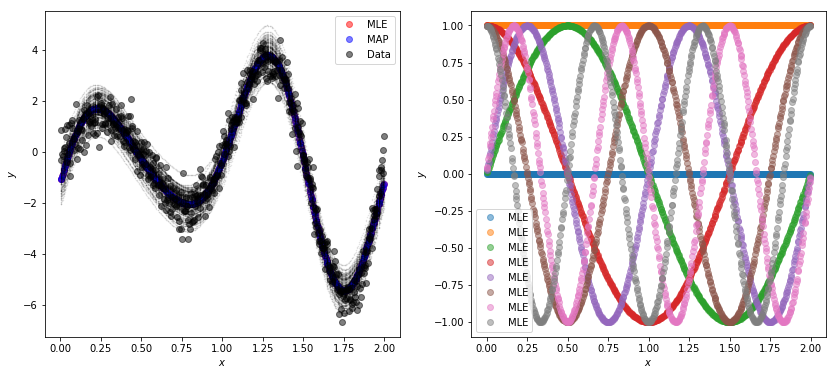

In [15]:
X_input = X_3

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.fit_MLE()
w_MAP, Lambda_inv = m.fit_MAP()


# Predict at a set of test points
X_star = X#np.linspace(0,2.,200)[:,None]
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.predictive_distribution(X_input)

print(mean_star.shape)
print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(X,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(X, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

(500, 1)
(500, 500)
(100, 500)


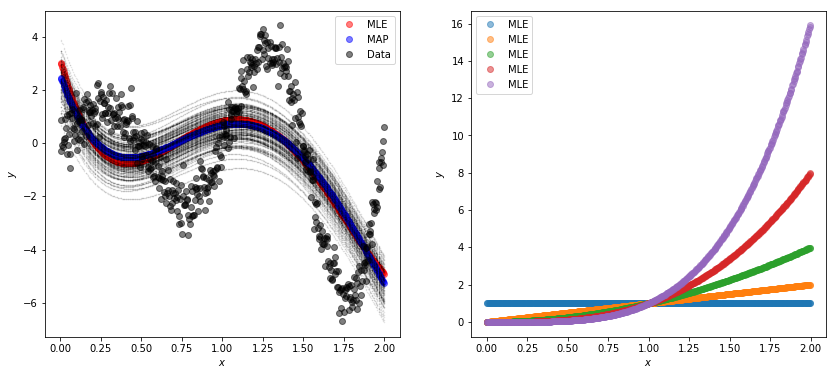

In [16]:
X_input = X_2

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.fit_MLE()
w_MAP, Lambda_inv = m.fit_MAP()


# Predict at a set of test points
X_star = X#np.linspace(0,2.,200)[:,None]
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.predictive_distribution(X_input)

print(mean_star.shape)
print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(X,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(X, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

(500, 1)
(500, 500)
(100, 500)


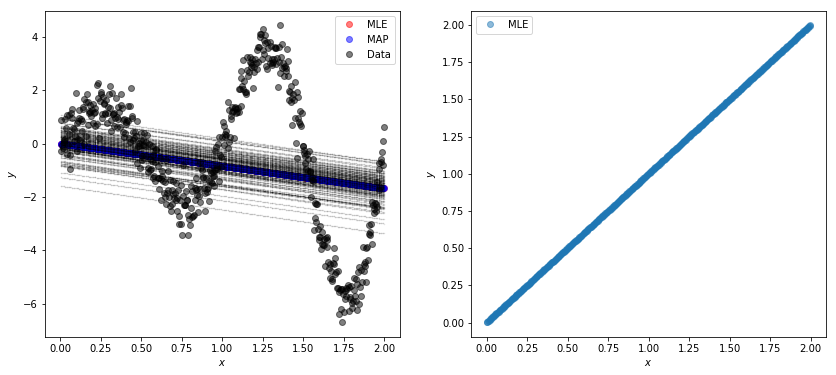

In [17]:
X_input = X_1

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.fit_MLE()
w_MAP, Lambda_inv = m.fit_MAP()


# Predict at a set of test points
X_star = X#np.linspace(0,2.,200)[:,None]
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.predictive_distribution(X_input)

print(mean_star.shape)
print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(X,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(X, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

(500, 1)
(500, 500)
(100, 500)


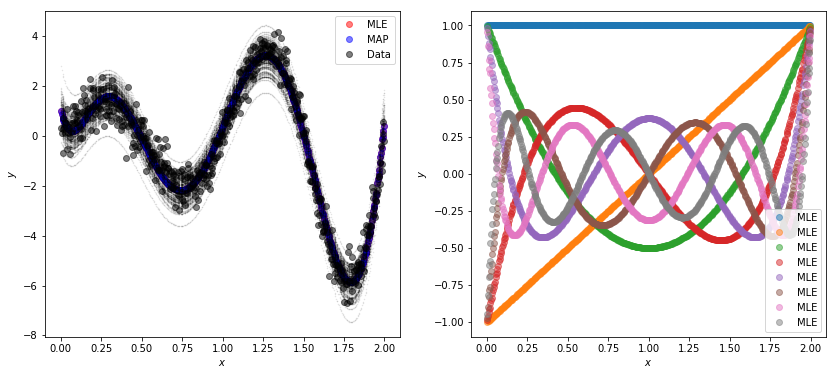

In [18]:
# N is the number of training points.
N = 500
M = 8
noise_var = 0.2
alpha = 1.0/noise_var
beta = 0.1

def feature_1(X, M):
    return X

def feature_2(X, M):
    N = X.shape[0]
    M = M + 1
    output = np.zeros((N,M))
    for i in range(M):
        output[:,i:i+1] = X ** i
    return output

def feature_3(X, M):
    N = X.shape[0]
    output = np.zeros((N,2*M))
    for i in range(M):
        output[:,2*i:2*i+1] = np.sin(i*np.pi*X)
        output[:,2*i+1:2*i+2] = np.cos(i*np.pi*X)
    return output   

def feature_4(X, M):
    N = X.shape[0]
    output = np.zeros((N,M))
    for i in range(M):
        infer = np.polynomial.legendre.Legendre.basis(i, [0, 2.])
        output[:,i:i+1] = infer(X)
    return output    

# Create random input and output data
X = 2 * lhs(1, N)

X = np.sort(X)
y = np.exp(X) * np.sin(2*np.pi*X) + 0.5*np.random.randn(N,1)

X_1 = feature_1(X, M)
X_2 = feature_2(X, M)
X_3 = feature_3(X, M)
X_4 = feature_4(X, M)

X_input = X_4

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.fit_MLE()
w_MAP, Lambda_inv = m.fit_MAP()


# Predict at a set of test points
X_star = X#np.linspace(0,2.,200)[:,None]
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.predictive_distribution(X_input)

print(mean_star.shape)
print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(X,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(X, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()



(500, 1)
(500, 500)
(100, 500)


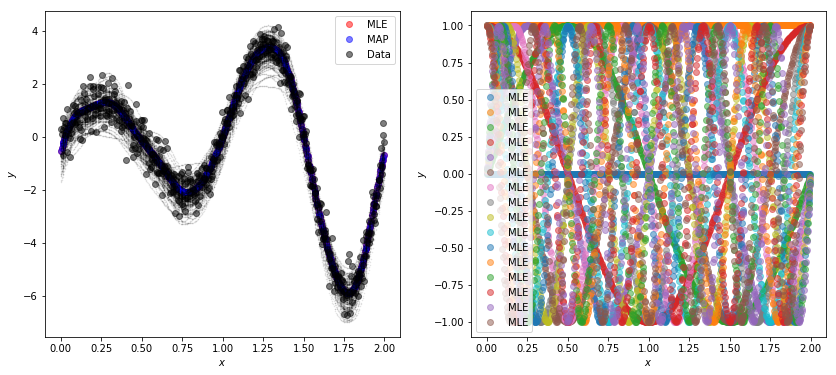

In [19]:
X_input = X_3

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.fit_MLE()
w_MAP, Lambda_inv = m.fit_MAP()


# Predict at a set of test points
X_star = X#np.linspace(0,2.,200)[:,None]
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.predictive_distribution(X_input)

print(mean_star.shape)
print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(X,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(X, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

(500, 1)
(500, 500)
(100, 500)


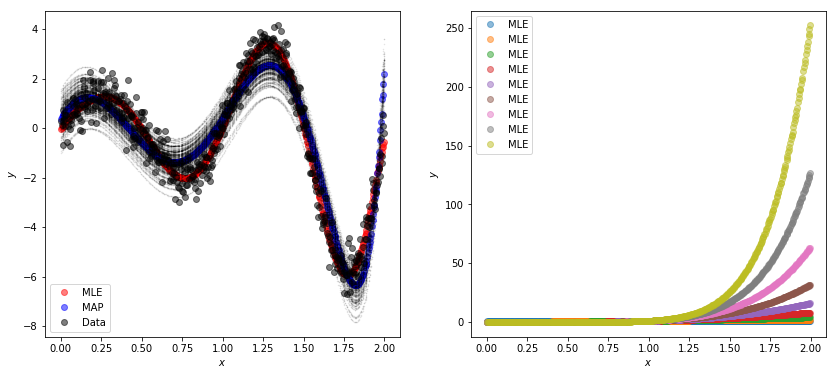

In [20]:
X_input = X_2

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.fit_MLE()
w_MAP, Lambda_inv = m.fit_MAP()


# Predict at a set of test points
X_star = X#np.linspace(0,2.,200)[:,None]
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.predictive_distribution(X_input)

print(mean_star.shape)
print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(X,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(X, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

(500, 1)
(500, 500)
(100, 500)


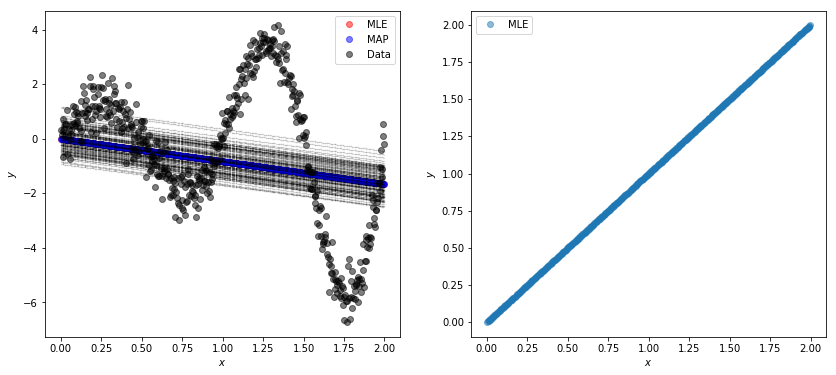

In [21]:
X_input = X_1

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.fit_MLE()
w_MAP, Lambda_inv = m.fit_MAP()


# Predict at a set of test points
X_star = X#np.linspace(0,2.,200)[:,None]
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.predictive_distribution(X_input)

print(mean_star.shape)
print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(X,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(X, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

(500, 1)
(500, 500)
(100, 500)


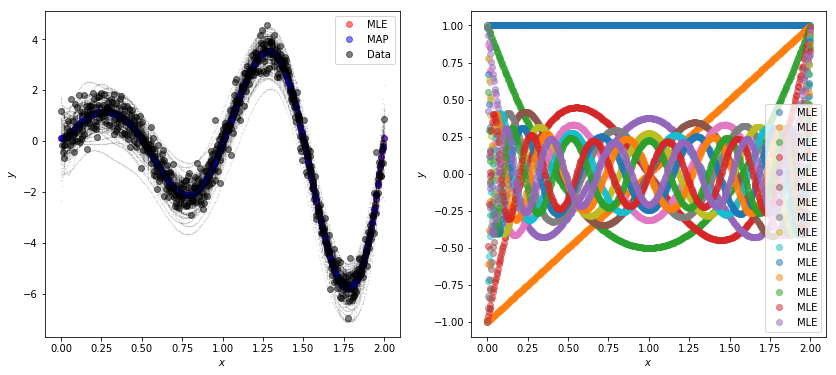

In [23]:
# N is the number of training points.
N = 500
M = 15
noise_var = 0.2
alpha = 1.0/noise_var
beta = 0.1

def feature_1(X, M):
    return X

def feature_2(X, M):
    N = X.shape[0]
    M = M + 1
    output = np.zeros((N,M))
    for i in range(M):
        output[:,i:i+1] = X ** i
    return output

def feature_3(X, M):
    N = X.shape[0]
    output = np.zeros((N,2*M))
    for i in range(M):
        output[:,2*i:2*i+1] = np.sin(i*np.pi*X)
        output[:,2*i+1:2*i+2] = np.cos(i*np.pi*X)
    return output   

def feature_4(X, M):
    N = X.shape[0]
    output = np.zeros((N,M))
    for i in range(M):
        infer = np.polynomial.legendre.Legendre.basis(i, [0, 2.])
        output[:,i:i+1] = infer(X)
    return output    

# Create random input and output data
X = 2 * lhs(1, N)

X = np.sort(X)
y = np.exp(X) * np.sin(2*np.pi*X) + 0.5*np.random.randn(N,1)

X_1 = feature_1(X, M)
X_2 = feature_2(X, M)
X_3 = feature_3(X, M)
X_4 = feature_4(X, M)

X_input = X_4

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.fit_MLE()
w_MAP, Lambda_inv = m.fit_MAP()


# Predict at a set of test points
X_star = X#np.linspace(0,2.,200)[:,None]
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.predictive_distribution(X_input)

print(mean_star.shape)
print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(X,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(X, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()


(500, 1)
(500, 500)
(100, 500)


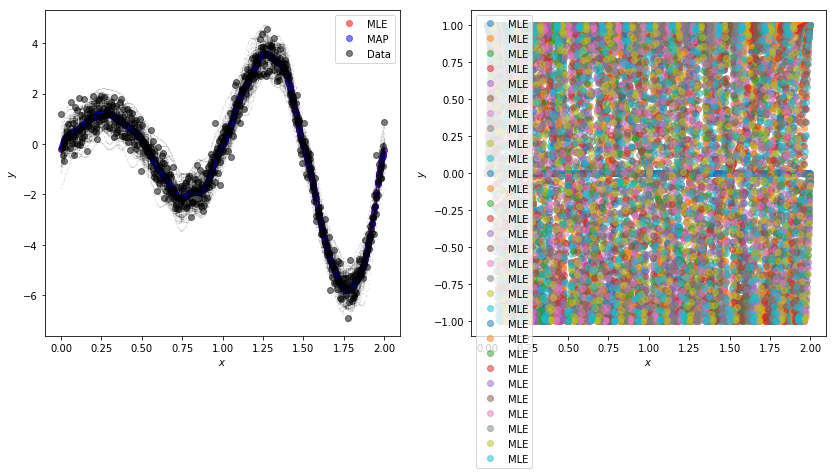

In [24]:
X_input = X_3

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.fit_MLE()
w_MAP, Lambda_inv = m.fit_MAP()


# Predict at a set of test points
X_star = X#np.linspace(0,2.,200)[:,None]
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.predictive_distribution(X_input)

print(mean_star.shape)
print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(X,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(X, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

(500, 1)
(500, 500)
(100, 500)


/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: covariance is not symmetric positive-semidefinite.


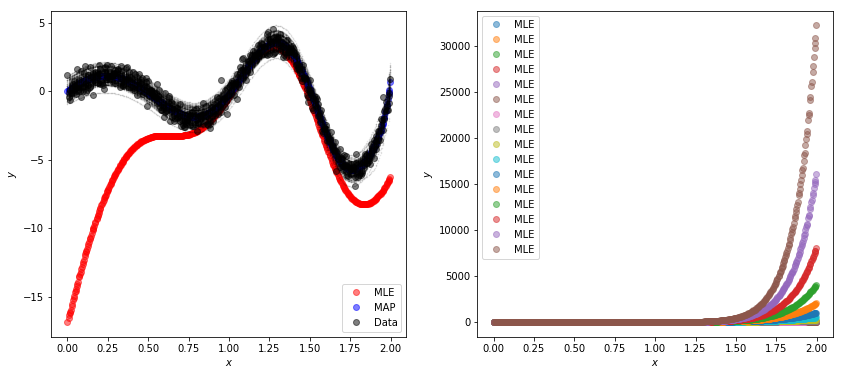

In [25]:
X_input = X_2

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.fit_MLE()
w_MAP, Lambda_inv = m.fit_MAP()


# Predict at a set of test points
X_star = X#np.linspace(0,2.,200)[:,None]
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.predictive_distribution(X_input)

print(mean_star.shape)
print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(X,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(X, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

(500, 1)
(500, 500)
(100, 500)


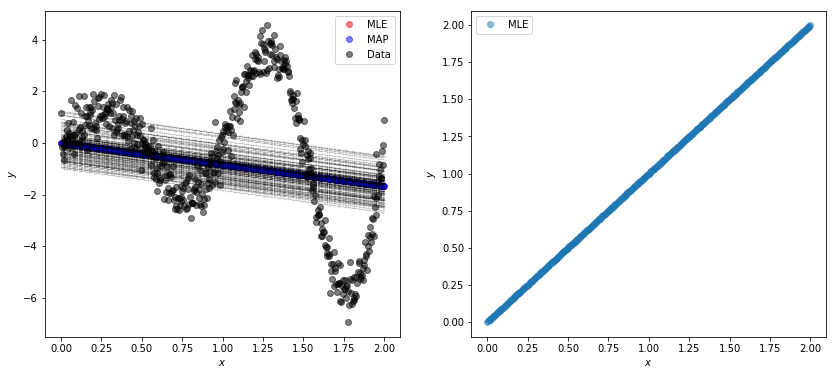

In [26]:
X_input = X_1

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.fit_MLE()
w_MAP, Lambda_inv = m.fit_MAP()


# Predict at a set of test points
X_star = X#np.linspace(0,2.,200)[:,None]
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.predictive_distribution(X_input)

print(mean_star.shape)
print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(X,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(X, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

For Fourier basis and Legendre basis, the accuracy grow with M increase. But identity feature does not change with M. The monomial basis is sensitive to the M index. Basicly speaking large M will cause overfitting. Legendre basis is the most outstanding one because it is orthogonal in the problem interval, while the others are not having this property. 